In [31]:
import pandas as pd


# Path to the file
file_path = r"C:\Users\Lenovo\OneDrive-CornellUniversity\Desktop\Cornell Meng CS\MEng Project 2\Final_Data_Analysis_Ethics.csv"

# Read the file into a dataframe
df = pd.read_csv(file_path)

In [32]:
import matplotlib.pyplot as plt

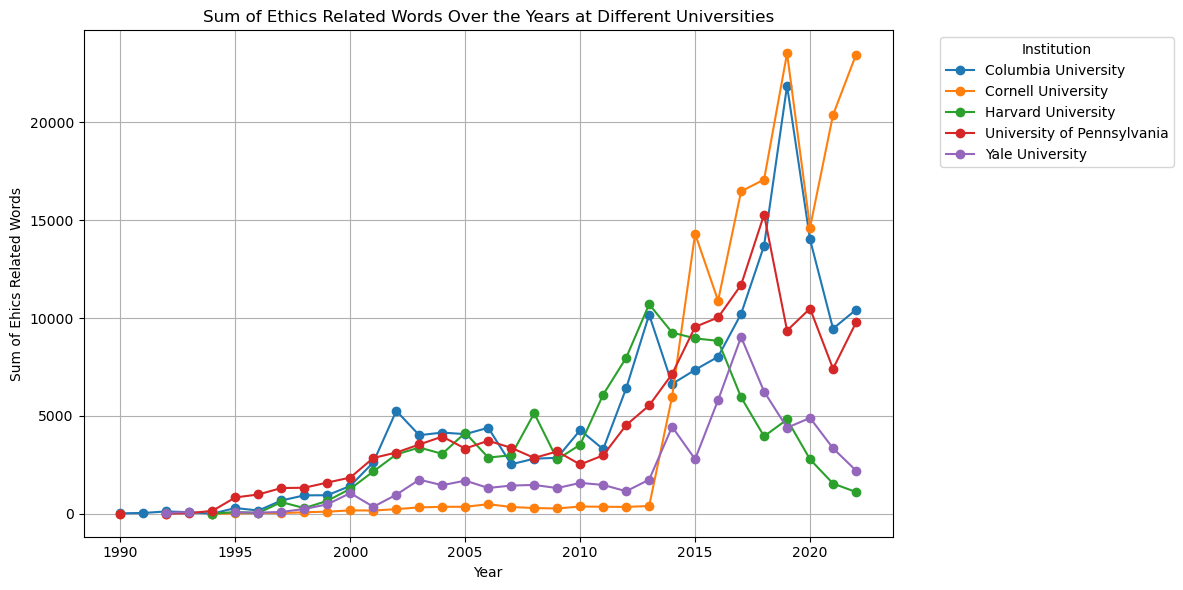

In [33]:
# Summing the Ethics related words over the years for each university
business_counts = df.groupby(['Institution', 'Year'])['EthicsCount'].sum().unstack()

# Plotting the line graph
plt.figure(figsize=(12, 6))
for institution in business_counts.index:
    plt.plot(business_counts.columns, business_counts.loc[institution], marker='o', label=institution)

plt.title('Sum of Ethics Related Words Over the Years at Different Universities')
plt.xlabel('Year')
plt.ylabel('Sum of Ehics Related Words')
plt.legend(title='Institution', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

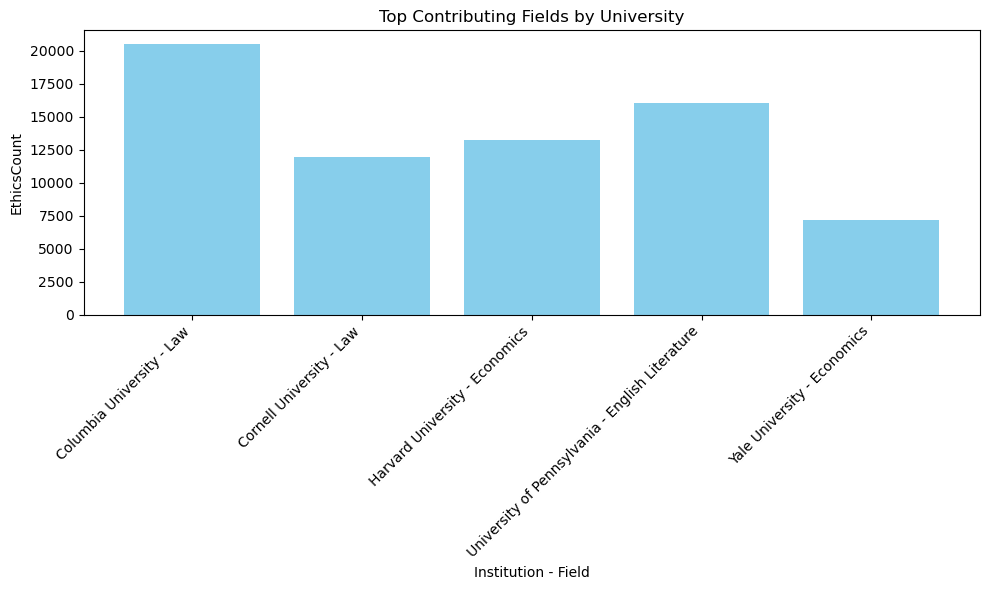

In [34]:
# Group by Institution and Field and sum the EthicsCount
grouped_df = df.groupby(['Institution', 'Field'])['EthicsCount'].sum().reset_index()

# Identify the fields that contribute the most to the EthicsCount in each university
max_contributors = grouped_df.loc[grouped_df.groupby('Institution')['EthicsCount'].idxmax()].reset_index(drop=True)

# Generate the bar graph
plt.figure(figsize=(10, 6))
plt.bar(max_contributors['Institution'] + ' - ' + max_contributors['Field'], max_contributors['EthicsCount'], color='skyblue')
plt.xlabel('Institution - Field')
plt.ylabel('EthicsCount')
plt.title('Top Contributing Fields by University')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Field
Law                      11915.70
Sociology                 8064.90
Economics                 7538.79
Psychology                7244.70
History                   6124.92
                           ...   
Basic Computer Skills       66.00
Cosmetology                 16.20
Criminology                 13.20
Construction                 6.90
Public Safety                0.00
Name: EthicsCount, Length: 66, dtype: float64


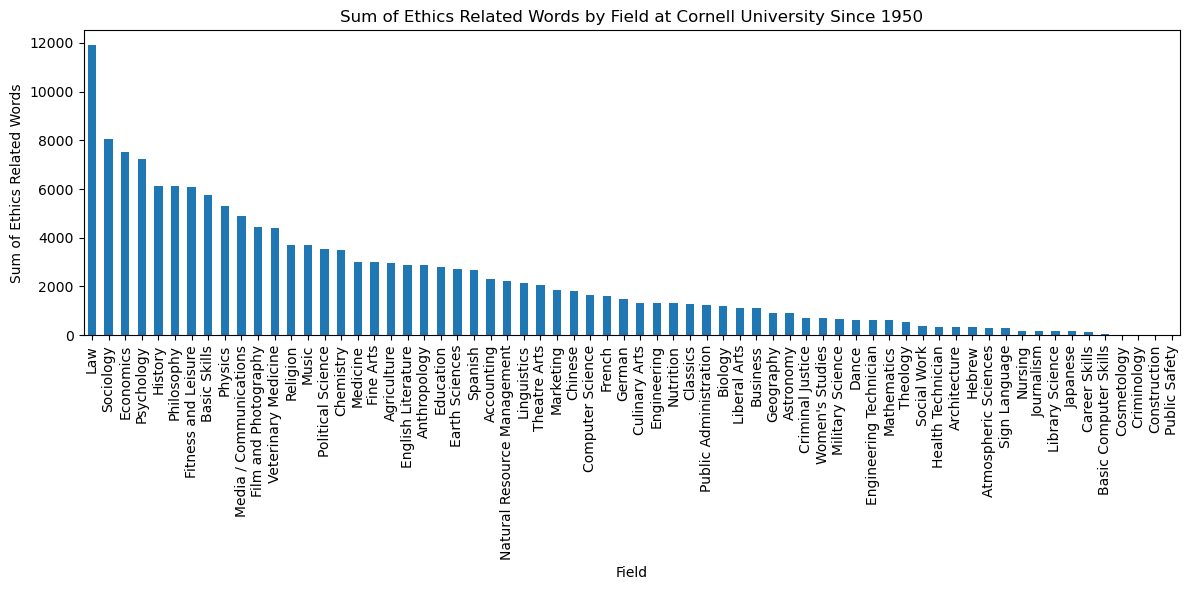

In [35]:
# Filter the data for Cornell University and years since 2015
cornell_data = df[(df['Institution'] == 'Cornell University') & (df['Year'] >= 1950)]

# Group by 'Field' and sum the 'EthicsCount'
field_business_counts = cornell_data.groupby('Field')['EthicsCount'].sum().sort_values(ascending=False)

# Display the result
print(field_business_counts)

# Plotting the results
plt.figure(figsize=(12, 6))
field_business_counts.plot(kind='bar')
plt.title('Sum of Ethics Related Words by Field at Cornell University Since 1950')
plt.xlabel('Field')
plt.ylabel('Sum of Ethics Related Words')
plt.tight_layout()
plt.show()

In [36]:
import numpy as np

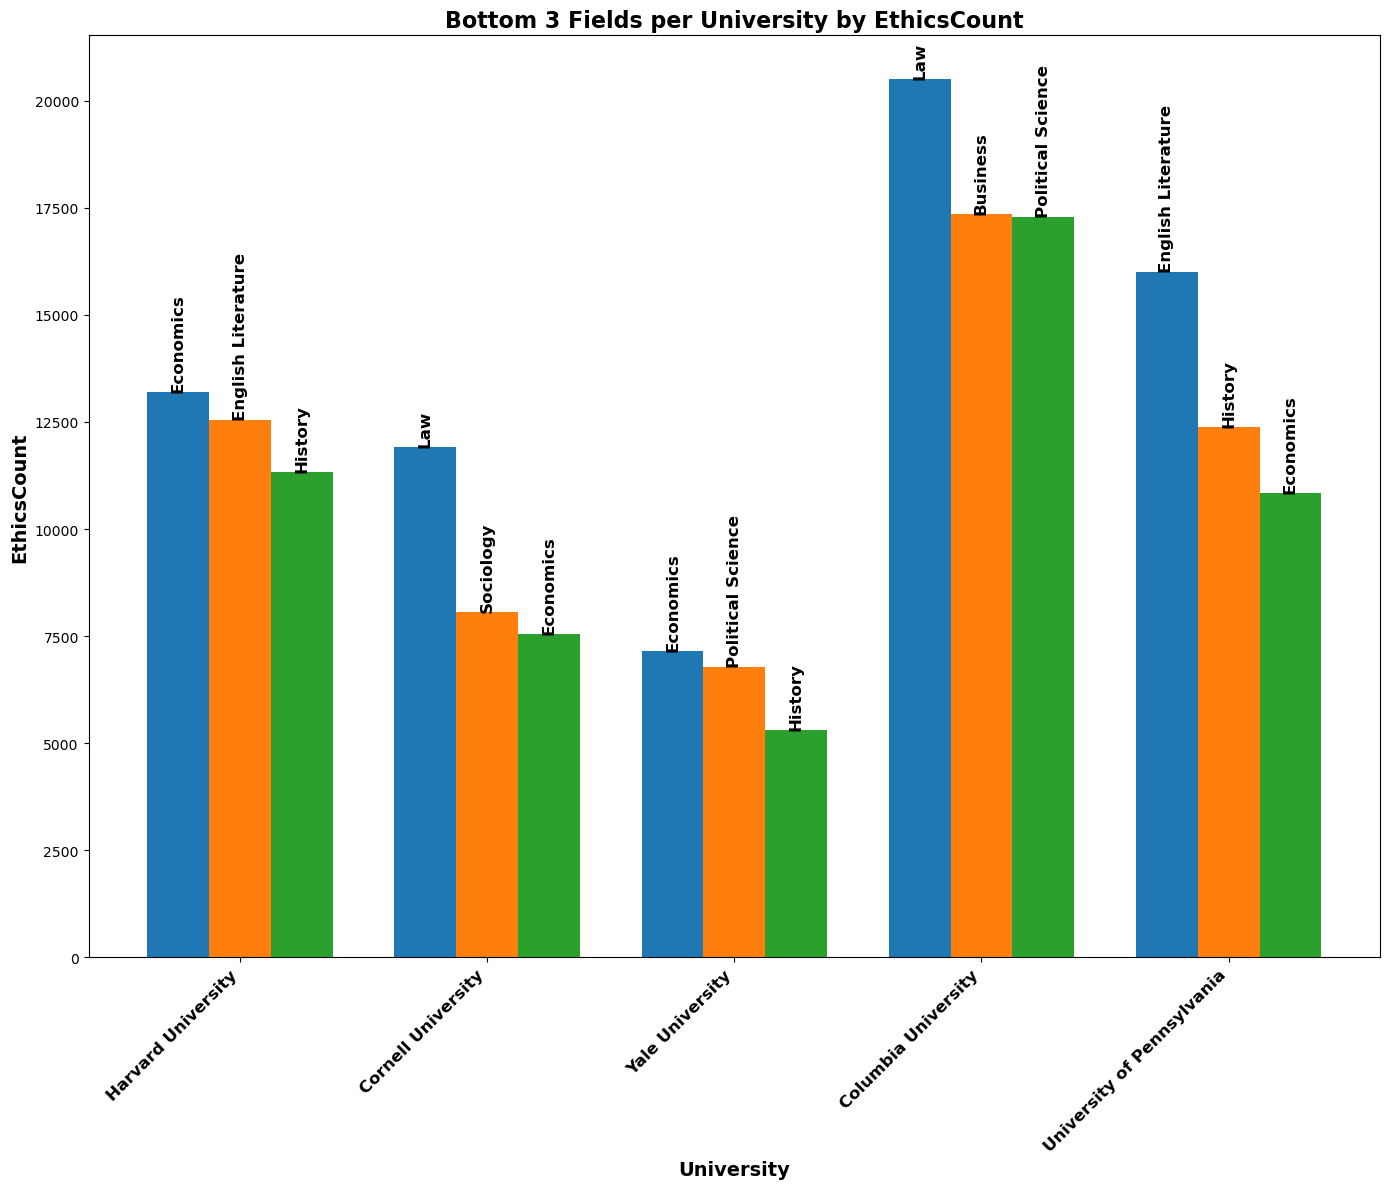

In [37]:
universities = ["Harvard University", "Cornell University", "Yale University", 
                "Columbia University", "University of Pennsylvania"]

# Filter the dataframe for the required universities
filtered_df = df[df['Institution'].isin(universities)]

# Group by Institution and Field, then sum the EthicsCount
grouped_df = filtered_df.groupby(['Institution', 'Field']).agg({'EthicsCount': 'sum'}).reset_index()

# Find the bottom 3 fields per university, handling cases with fewer than 3 fields or fields with a count of 0
bottom_fields_per_uni = grouped_df.groupby('Institution').apply(lambda x: x.nlargest(3, 'EthicsCount')).reset_index(drop=True)

# Define the width of the bars
bar_width = 0.25

# Plotting with increased height in the frame
fig, ax = plt.subplots(figsize=(14, 12))  # Increased height from 7 to 12 for better label accommodation

# Create a bar plot for each university and its bottom 3 fields
university_positions = {}

for idx, institution in enumerate(universities):
    subset = bottom_fields_per_uni[bottom_fields_per_uni['Institution'] == institution]
    num_fields = len(subset)
    positions = np.arange(idx, idx + num_fields * bar_width, step=bar_width)
    university_positions[institution] = np.mean(positions)  # Store mean position for labels
    for field_idx, row in enumerate(subset.itertuples()):
        bar_position = positions[field_idx]
        bar_height = row.EthicsCount if row.EthicsCount > 0 else 0.1  # Slightly raise zero counts for visibility
        ax.bar(bar_position, bar_height, width=bar_width, color=f"C{field_idx}")
        # Position label higher above the bar for better visibility
        label_y_pos = bar_height + 0.5  # Increase this offset if still colliding
        ax.text(bar_position, label_y_pos, f"{row.Field}", rotation=90, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the plot
ax.set_title('Bottom 3 Fields per University by EthicsCount', fontsize=16, fontweight='bold')
ax.set_xlabel('University', fontsize=14, fontweight='bold')
ax.set_ylabel('EthicsCount', fontsize=14, fontweight='bold')

# Set x-ticks to be in the middle of each group of bars
ax.set_xticks([university_positions[uni] for uni in universities])
ax.set_xticklabels(universities, rotation=45, ha='right', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

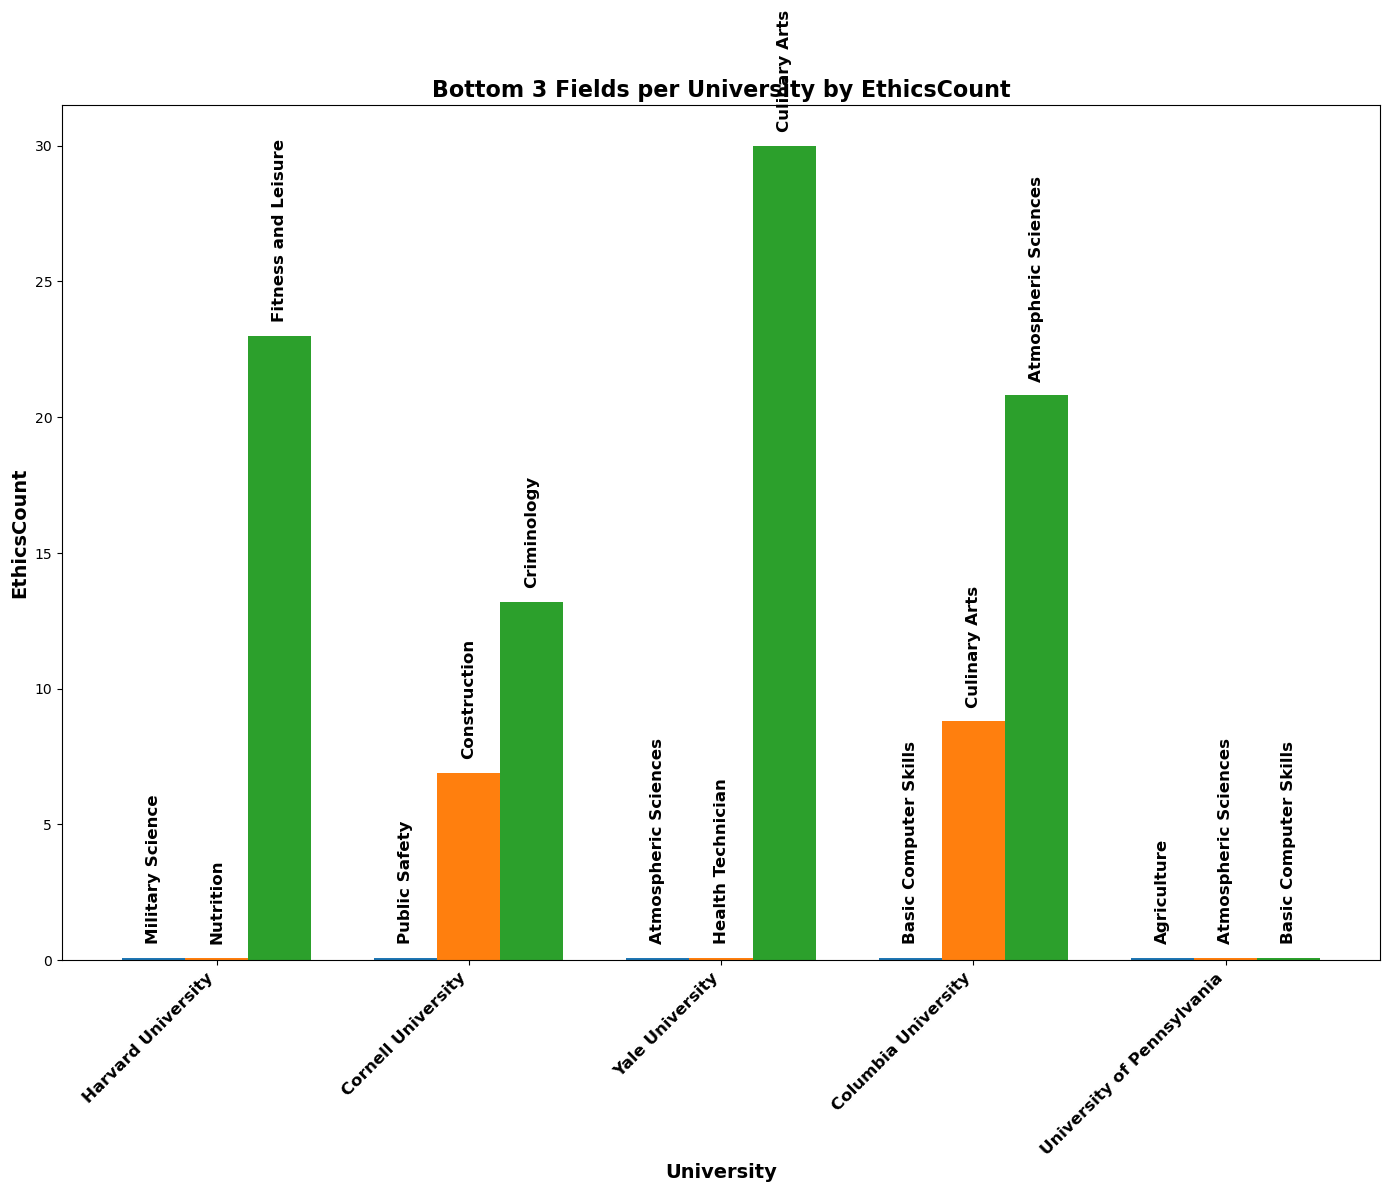

In [38]:
universities = ["Harvard University", "Cornell University", "Yale University", 
                "Columbia University", "University of Pennsylvania"]

# Filter the dataframe for the required universities
filtered_df = df[df['Institution'].isin(universities)]

# Group by Institution and Field, then sum the EthicsCount
grouped_df = filtered_df.groupby(['Institution', 'Field']).agg({'EthicsCount': 'sum'}).reset_index()

# Find the bottom 3 fields per university, handling cases with fewer than 3 fields or fields with a count of 0
bottom_fields_per_uni = grouped_df.groupby('Institution').apply(lambda x: x.nsmallest(3, 'EthicsCount')).reset_index(drop=True)

# Define the width of the bars
bar_width = 0.25

# Plotting with increased height in the frame
fig, ax = plt.subplots(figsize=(14, 12))  # Increased height from 7 to 12 for better label accommodation

# Create a bar plot for each university and its bottom 3 fields
university_positions = {}

for idx, institution in enumerate(universities):
    subset = bottom_fields_per_uni[bottom_fields_per_uni['Institution'] == institution]
    num_fields = len(subset)
    positions = np.arange(idx, idx + num_fields * bar_width, step=bar_width)
    university_positions[institution] = np.mean(positions)  # Store mean position for labels
    for field_idx, row in enumerate(subset.itertuples()):
        bar_position = positions[field_idx]
        bar_height = row.EthicsCount if row.EthicsCount > 0 else 0.1  # Slightly raise zero counts for visibility
        ax.bar(bar_position, bar_height, width=bar_width, color=f"C{field_idx}")
        # Position label higher above the bar for better visibility
        label_y_pos = bar_height + 0.5  # Increase this offset if still colliding
        ax.text(bar_position, label_y_pos, f"{row.Field}", rotation=90, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the plot
ax.set_title('Bottom 3 Fields per University by EthicsCount', fontsize=16, fontweight='bold')
ax.set_xlabel('University', fontsize=14, fontweight='bold')
ax.set_ylabel('EthicsCount', fontsize=14, fontweight='bold')

# Set x-ticks to be in the middle of each group of bars
ax.set_xticks([university_positions[uni] for uni in universities])
ax.set_xticklabels(universities, rotation=45, ha='right', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()